# Практическая работа 2
# Выполняет Волейко Андрей Владимирович

### Первым делом работаем с данными и получаем информацию.

In [7]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def wine_is_good(row):
  if row["quality"] >= 6.0:
    return 1
  else:
    return 0

data_red = pd.read_csv("winequality-red.csv", sep=';') # Этап 3.1: Загружаем данные о красном вине
print(data_red.columns)
if data_red.isnull().any().any(): # Этап 3.2: Проверяем на наличие недостающих данных
  print("Недостающие данные присутствуют! Проводится заполнение средними значениями.")
  data_red.fillna(data_red.mean(), inplace=True)
else:
  print("Недостающие данные отсутствуют!")

data_red["is good"] = data_red.apply(wine_is_good, axis=1) # Этап 3.3:
data_red

lower_bound = data_red["quality"].quantile(q=0.025) # 25 процентиль
upper_bound = data_red["quality"].quantile(q=0.975) # 75 процентиль

q3, q1 = np.percentile(data_red["quality"], [97.5, 2.5])
iqr = 1.5* (q3 - q1)

print(f"{q3} {q1} {iqr}")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

print(data_red[(data_red["quality"].values > upper_bound) | (data_red["quality"].values < lower_bound)].count())
data_red = data_red[(data_red["quality"].values <= upper_bound) & (data_red["quality"].values >= lower_bound)] # Удаляем найденные выбросы

median_values = data_red.median() # Ищем медианные значения для всех признаков
print(median_values)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Недостающие данные отсутствуют!
7.0 4.0 4.5
Нижняя граница: 4.0
Верхняя граница: 7.0
fixed acidity           28
volatile acidity        28
citric acid             28
residual sugar          28
chlorides               28
free sulfur dioxide     28
total sulfur dioxide    28
density                 28
pH                      28
sulphates               28
alcohol                 28
quality                 28
is good                 28
dtype: int64
fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.6

### График распределения по качеству

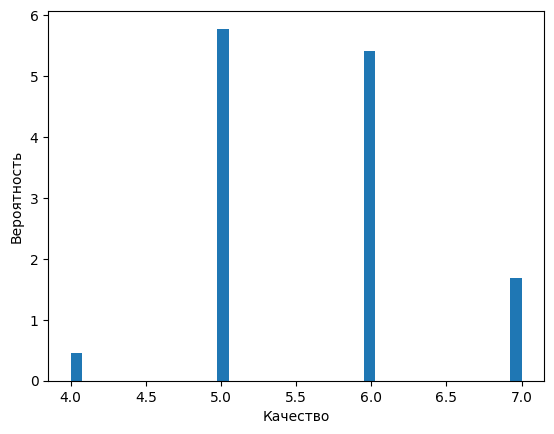

In [8]:
plt.xlabel('Качество')
plt.ylabel('Вероятность')
plt.hist(x=data_red['quality'], bins=40, density=True)
plt.show()

### График “ящик с усами” по показателю качества

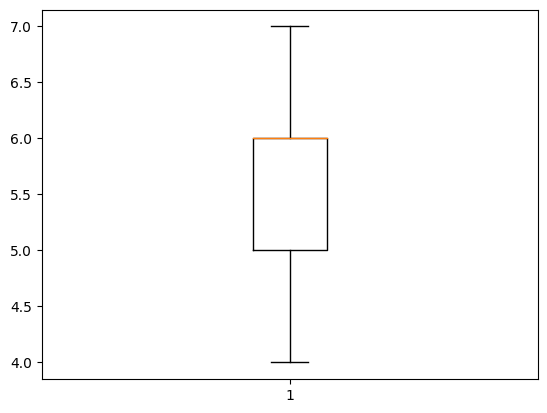

In [9]:
plt.boxplot(x=data_red['quality'])
plt.show()

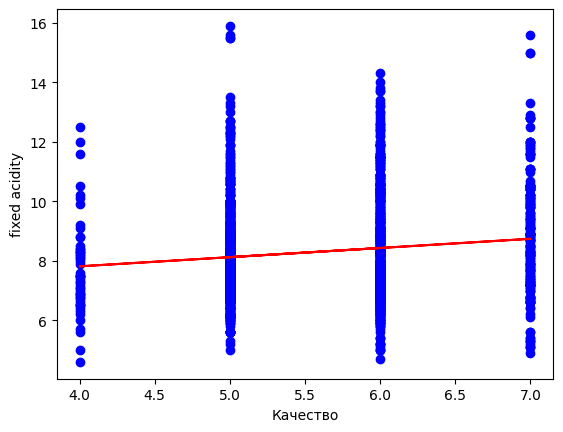

In [10]:
# Данные
X = data_red["quality"].values.reshape(-1, 1)
y = data_red["fixed acidity"]
# Модель линейной регрессии
model = LinearRegression()
model.fit(X, y)
# Предсказания
y_pred = model.predict(X)
# Визуализация
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Качество')
plt.ylabel('fixed acidity')
plt.show()

### Графики распределений по каждому признаку

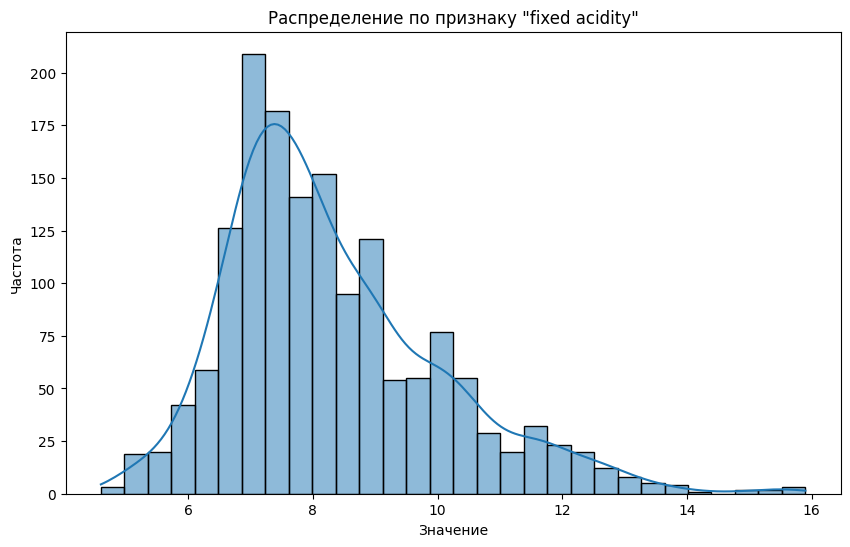

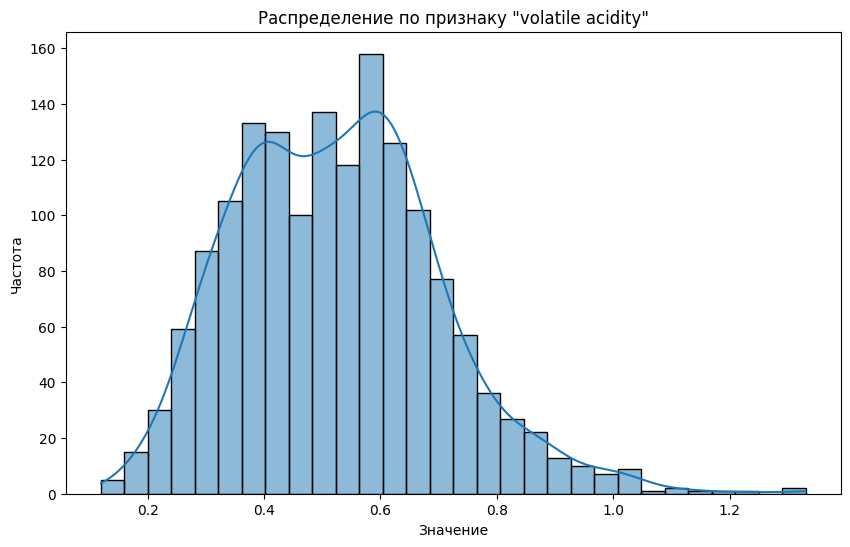

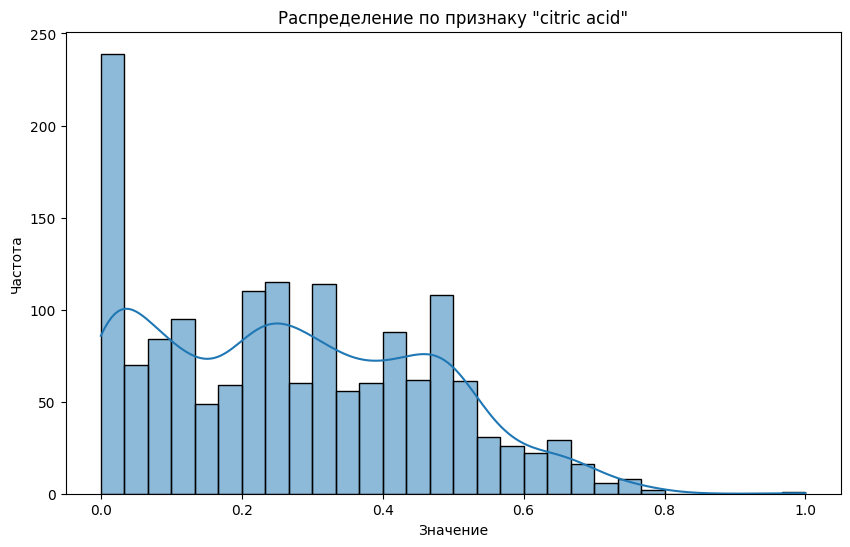

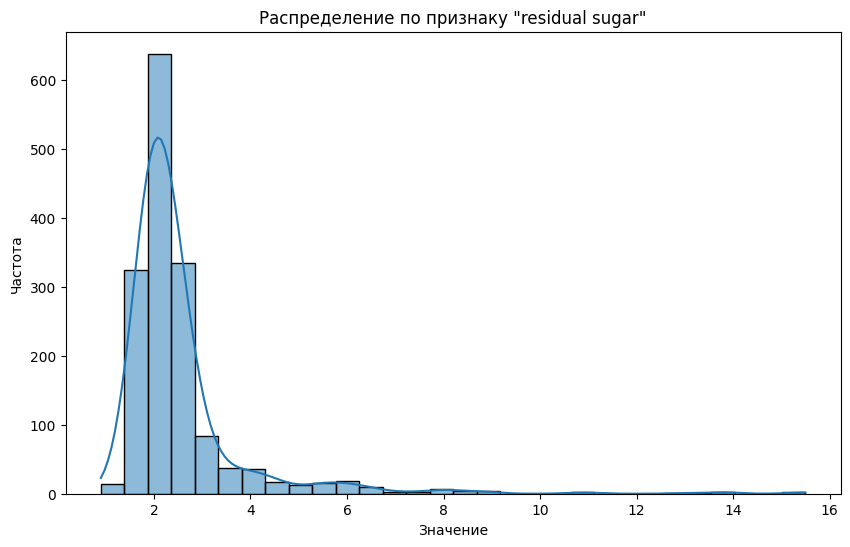

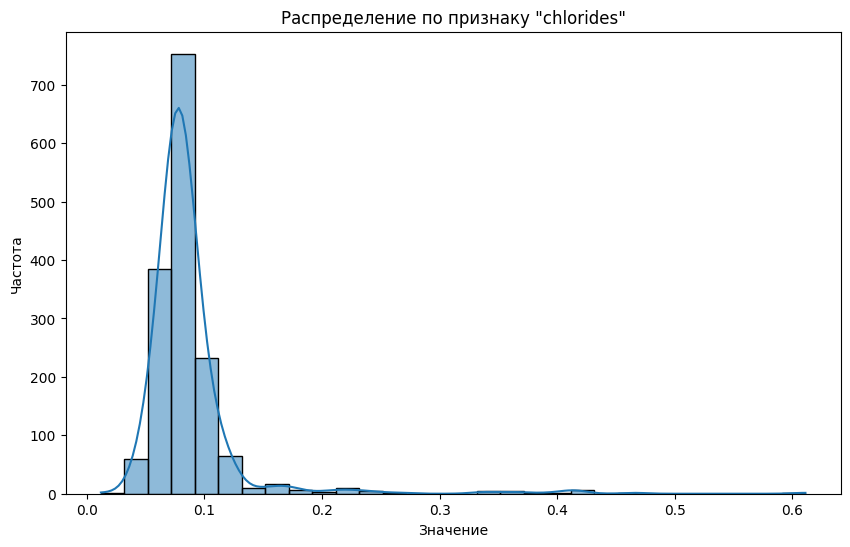

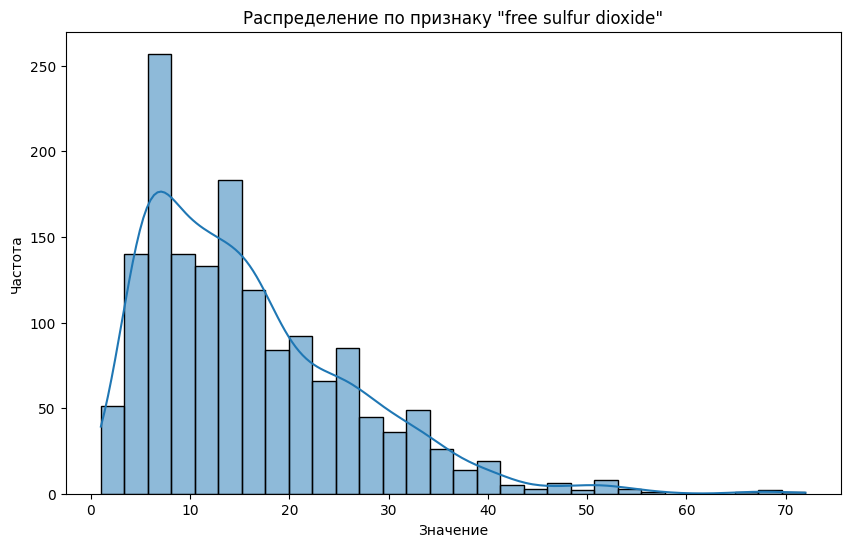

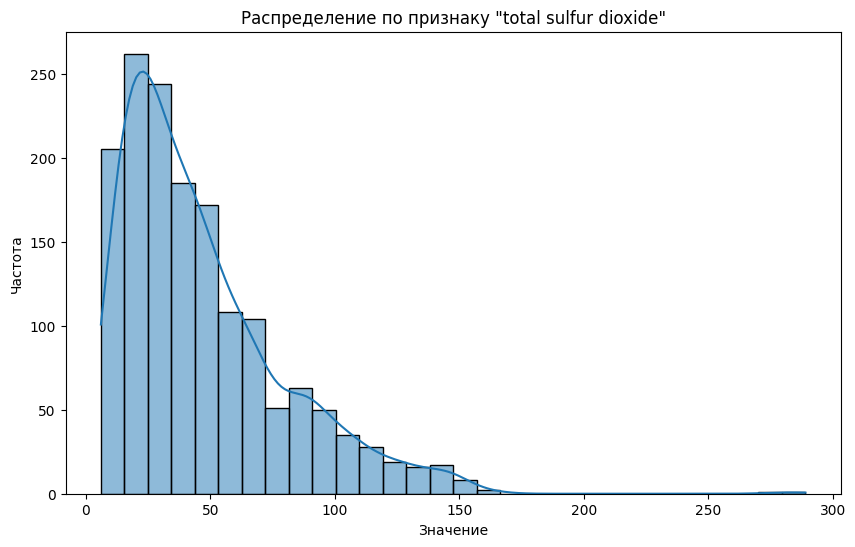

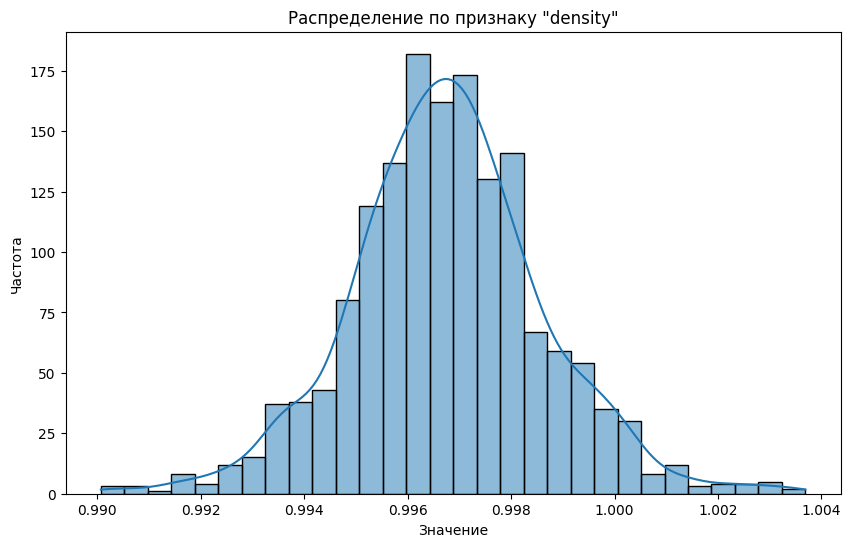

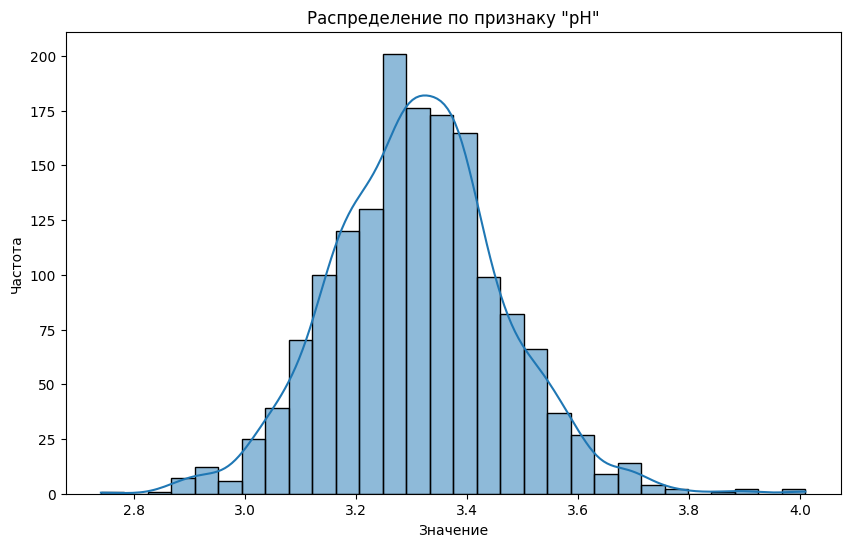

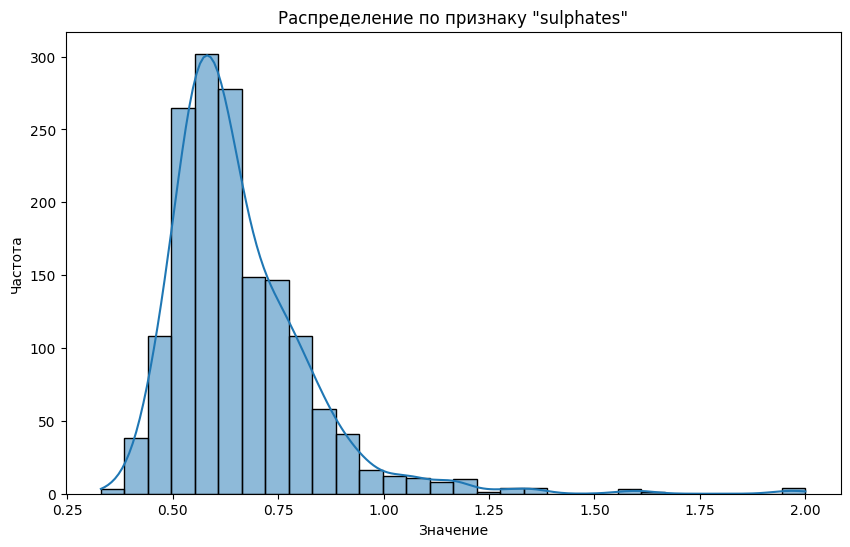

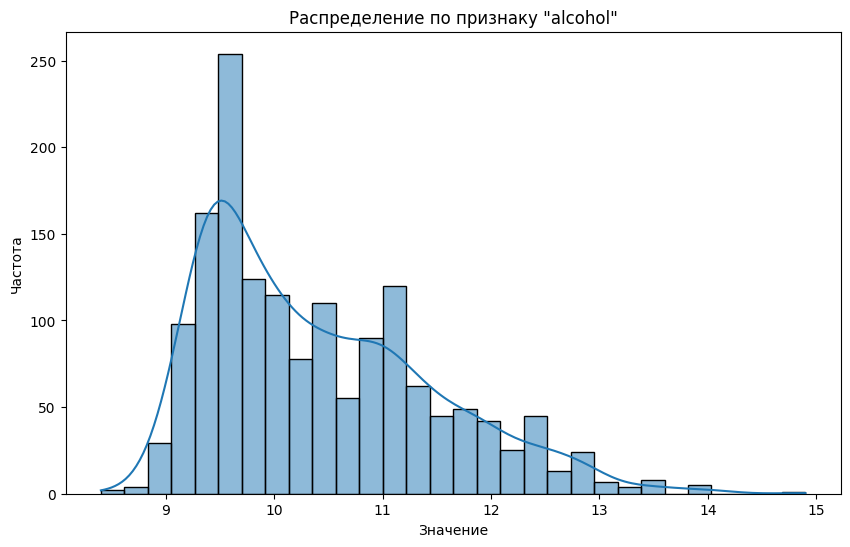

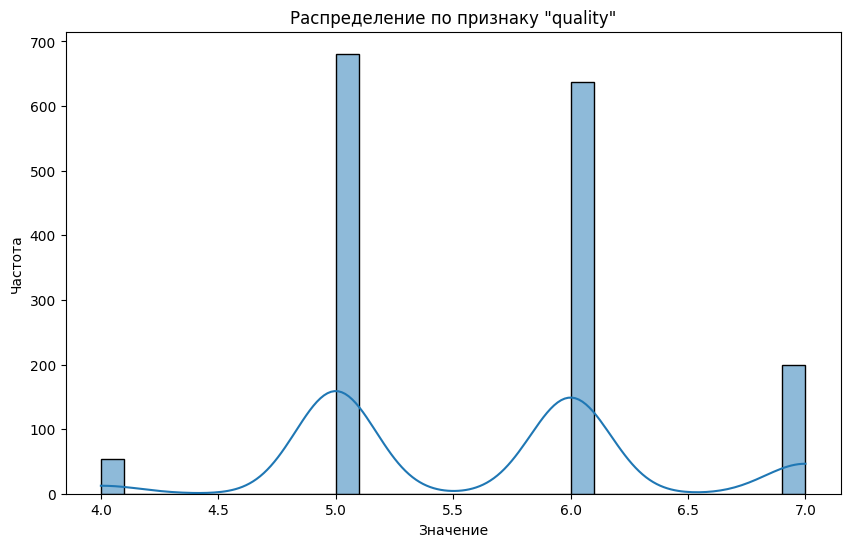

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data_red['fixed acidity'], bins=30, kde=True)
plt.title('Распределение по признаку "fixed acidity"')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_red['volatile acidity'], bins=30, kde=True)
plt.title('Распределение по признаку "volatile acidity"')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_red['citric acid'], bins=30, kde=True)
plt.title('Распределение по признаку "citric acid"')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_red['residual sugar'], bins=30, kde=True)
plt.title('Распределение по признаку "residual sugar"')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_red['chlorides'], bins=30, kde=True)
plt.title('Распределение по признаку "chlorides"')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_red['free sulfur dioxide'], bins=30, kde=True)
plt.title('Распределение по признаку "free sulfur dioxide"')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_red['total sulfur dioxide'], bins=30, kde=True)
plt.title('Распределение по признаку "total sulfur dioxide"')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_red['density'], bins=30, kde=True)
plt.title('Распределение по признаку "density"')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_red['pH'], bins=30, kde=True)
plt.title('Распределение по признаку "pH"')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_red['sulphates'], bins=30, kde=True)
plt.title('Распределение по признаку "sulphates"')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_red['alcohol'], bins=30, kde=True)
plt.title('Распределение по признаку "alcohol"')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_red['quality'], bins=30, kde=True)
plt.title('Распределение по признаку "quality"')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

### График матрицы корреляций между признаками

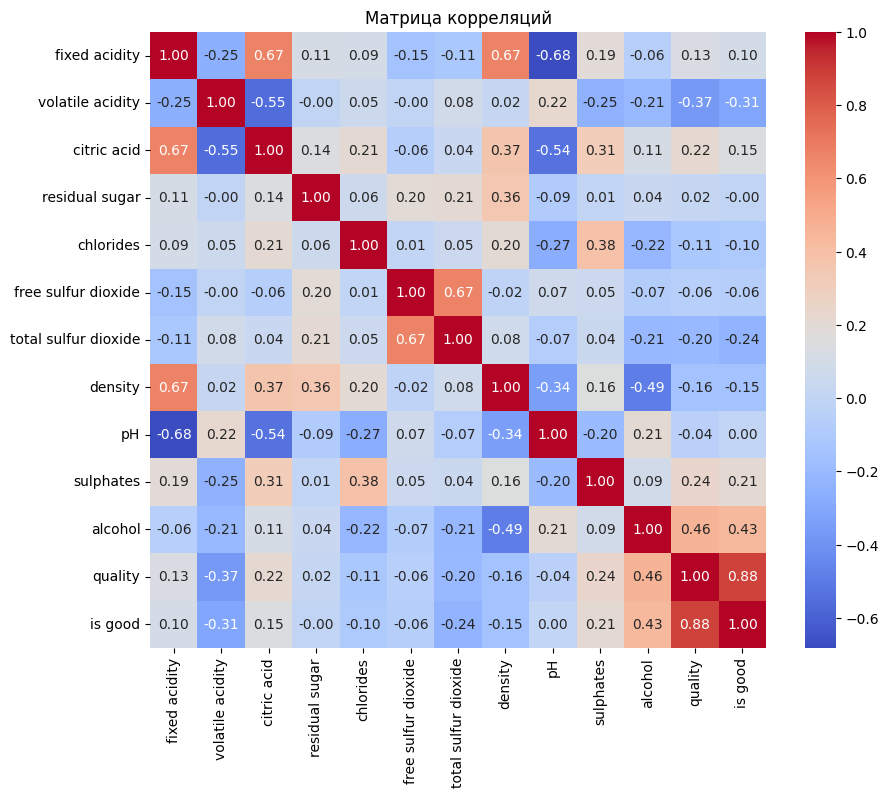

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_red.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Матрица корреляций')
plt.show()